In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import pandas as pd

In [2]:
bali = pd.read_csv('bali_min4.csv')
jabar = pd.read_csv('jawabarat_min4.csv')
# df = pd.concat([bali, jabar], axis=0)
jatengjatim = pd.read_csv('jatengjatim_min4.csv')
# df = pd.concat([bali, jatengjatim], axis=0)
# df = pd.concat([jabar, jatengjatim], axis=0)
df = pd.concat([bali, jabar, jatengjatim], axis=0)
# df = pd.read_csv('southern_california_min25.csv')
df['timestamp'] = pd.to_datetime(df['time'], errors='coerce', utc=False)
df['Datetime'] = df['timestamp']
df.set_index('timestamp', inplace=True)
df = df.sort_index(ascending=True)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Datetime
timestamp,,,,,,,,,,,,,,,,,,,,,
1995-01-01 02:02:25.490000+00:00,1995-01-01T02:02:25.490Z,-10.9270,113.0110,18.90,4.5,mb,NaN,NaN,NaN,1.20,...,"294 km S of Kencong, Indonesia",earthquake,NaN,8.5,NaN,4.0,reviewed,us,us,1995-01-01 02:02:25.490000+00:00
1995-01-07 15:02:59.810000+00:00,1995-01-07T15:02:59.810Z,-9.0250,110.7550,114.80,4.7,mb,NaN,NaN,NaN,0.80,...,"126 km SSE of Pundong, Indonesia",earthquake,NaN,21.5,NaN,12.0,reviewed,us,us,1995-01-07 15:02:59.810000+00:00
1995-01-07 18:37:28.920000+00:00,1995-01-07T18:37:28.920Z,-9.2310,117.1110,33.00,4.2,mb,NaN,NaN,NaN,0.90,...,"88 km SSW of Sumbawa Besar, Indonesia",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us,1995-01-07 18:37:28.920000+00:00
1995-01-19 09:19:57.180000+00:00,1995-01-19T09:19:57.180Z,-10.7640,117.1200,33.00,4.9,mb,NaN,NaN,NaN,1.30,...,"246 km SSE of Praya, Indonesia",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us,1995-01-19 09:19:57.180000+00:00
1995-02-16 16:27:25.400000+00:00,1995-02-16T16:27:25.400Z,-10.0560,113.8580,33.00,4.0,mb,NaN,NaN,NaN,0.40,...,"186 km S of Gambiran Satu, Indonesia",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us,1995-02-16 16:27:25.400000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 15:16:45.796000+00:00,2020-12-20T15:16:45.796Z,-9.2506,110.8510,35.00,4.2,mb,NaN,148.0,1.368,0.58,...,"153 km SSE of Pundong, Indonesia",earthquake,8.9,1.9,0.186,8.0,reviewed,us,us,2020-12-20 15:16:45.796000+00:00
2020-12-20 15:53:57.395000+00:00,2020-12-20T15:53:57.395Z,-9.2936,112.1503,35.00,4.3,mb,NaN,53.0,2.114,0.90,...,"130 km SSW of Sumberpucung, Indonesia",earthquake,5.3,2.0,0.142,14.0,reviewed,us,us,2020-12-20 15:53:57.395000+00:00
2020-12-22 03:27:21.031000+00:00,2020-12-22T03:27:21.031Z,-9.5505,112.5698,35.00,4.1,mb,NaN,120.0,1.896,0.94,...,"149 km S of Dampit, Indonesia",earthquake,5.6,1.9,0.175,9.0,reviewed,us,us,2020-12-22 03:27:21.031000+00:00


In [3]:
df = df[['depth', 'mag']]
df

,depth,mag
timestamp,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5
1995-01-07 15:02:59.810000+00:00,114.80,4.7
1995-01-07 18:37:28.920000+00:00,33.00,4.2
1995-01-19 09:19:57.180000+00:00,33.00,4.9
1995-02-16 16:27:25.400000+00:00,33.00,4.0
...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2
2020-12-20 15:53:57.395000+00:00,35.00,4.3
2020-12-22 03:27:21.031000+00:00,35.00,4.1


In [4]:
print(df.isna().sum())

depth    0
mag      0
dtype: int64


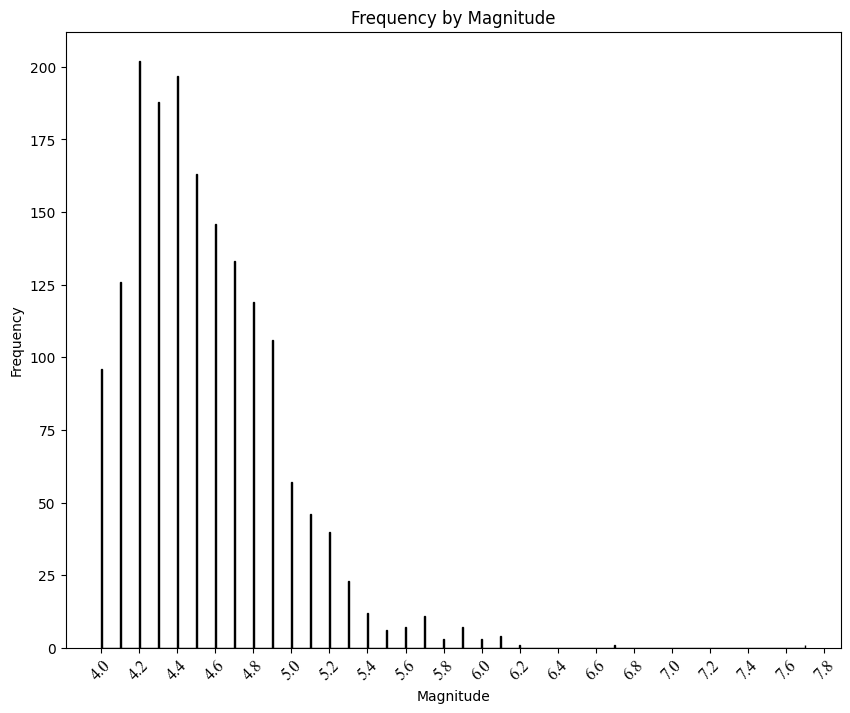

In [5]:
mag_unique, frequency = np.unique(df['mag'], return_counts=True)

plt.figure(figsize=(10,8))
plt.hist(df['mag'], bins=1000, color='black', edgecolor='black')

bins = [0, 20, 40, 60]

from matplotlib.ticker import MultipleLocator
# Set x-axis scale to increment by 0.5
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
# Add titles and labels
plt.title('Frequency by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.xticks(fontsize=12, fontname='Times New Roman', rotation=45)

# Show the plot
plt.show()

In [6]:
mag_filter = 4.4
depth_filter = 100
resample_rate = '2W'

In [7]:
# Initialize the 'ED' column with NaN values
df['ED'] = np.nan

# Filter the dataframe for earthquakes with magnitude greater than mag_filter
filtered_df = df[df['mag'] > mag_filter]

n = 50

# Calculate the elapsed days for the last n earthquake events
for i in range(n, len(filtered_df)):
    current_time = filtered_df.index[i]
    past_time = filtered_df.index[i-n]
    elapsed_days = (current_time - past_time).days
    df.loc[current_time, 'ED'] = elapsed_days

# Fill NaN values in 'ED' column
for i in range(len(df)):
    if pd.isna(df.iloc[i]['ED']):
        # Find the latest valid 'ED' value before the current index
        last_valid_index = df.iloc[:i]['ED'].last_valid_index()
        if last_valid_index is not None:
            time_since_last_valid = (df.index[i] - last_valid_index).days
            df.at[df.index[i], 'ED'] = df.at[last_valid_index, 'ED'] + time_since_last_valid

# df = df.dropna(subset=['ED'])
df

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\388928700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ED'] = np.nan


,depth,mag,ED
timestamp,,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5,NaN
1995-01-07 15:02:59.810000+00:00,114.80,4.7,NaN
1995-01-07 18:37:28.920000+00:00,33.00,4.2,NaN
1995-01-19 09:19:57.180000+00:00,33.00,4.9,NaN
1995-02-16 16:27:25.400000+00:00,33.00,4.0,NaN
...,...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2,653.0
2020-12-20 15:53:57.395000+00:00,35.00,4.3,653.0
2020-12-22 03:27:21.031000+00:00,35.00,4.1,654.0


In [8]:

# Initialize the 'energy_squared' and 'cumulative_energy_squared' columns with NaN values
df['energy_squared_root'] = np.nan
df['cumulative_energy_squared'] = np.nan

df['energy'] = 10**(11.8+1.5*df['mag'])

# Calculate the energy squared for each data point
df['energy_squared_root'] = np.sqrt(df['energy'])

# Calculate the cumulative sum of energy squared for the last 50 data points
# for i in range(n, len(df)):
#     df.iloc[i, df.columns.get_loc('cumulative_energy_squared')] = df.iloc[i-n:i]['energy_squared_root'].sum()

df['cumulative_energy_squared'] = df['energy_squared_root'].rolling(n).sum()

# Calculate the RSRER
df['RSRER'] = df['cumulative_energy_squared'] / df['ED']

df['mean_mag'] = df['mag'].rolling(n).mean()
df['min_mag'] = df['mag'].rolling(n).min()
df['b_value'] = np.log10(np.e)/(df['mean_mag'] - df['min_mag'])

df['event_counts'] = df['mag'].rolling(n).apply(lambda x: (x > mag_filter).sum(), raw=True)
df['a_value'] = (np.log10(df['event_counts']) + df['b_value']*df['min_mag'])/n
# df['MSD'] = np.sum((np.log10(df['event_counts'])-(df['a_value']-(df['b_value']*df['mag'])))**2)/(n-1)
df['max_mag'] = df['mag'].rolling(n).max()
df['MD'] = df['a_value']/df['b_value'] - df['max_mag']
# print(df['event_counts'])

df 

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\2738765218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_squared_root'] = np.nan
C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\2738765218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_energy_squared'] = np.nan
C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\2738765218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,depth,mag,ED,energy_squared_root,cumulative_energy_squared,energy,RSRER,mean_mag,min_mag,b_value,event_counts,a_value,max_mag,MD
timestamp,,,,,,,,,,,,,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5,NaN,1.883649e+09,NaN,3.548134e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-07 15:02:59.810000+00:00,114.80,4.7,NaN,2.660725e+09,NaN,7.079458e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-07 18:37:28.920000+00:00,33.00,4.2,NaN,1.122018e+09,NaN,1.258925e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-19 09:19:57.180000+00:00,33.00,4.9,NaN,3.758374e+09,NaN,1.412538e+19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-16 16:27:25.400000+00:00,33.00,4.0,NaN,7.943282e+08,NaN,6.309573e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2,653.0,1.122018e+09,9.353097e+10,1.258925e+18,1.432327e+08,4.430,4.0,1.009987,20.0,0.106820,5.2,-5.094237
2020-12-20 15:53:57.395000+00:00,35.00,4.3,653.0,1.333521e+09,9.353097e+10,1.778279e+18,1.432327e+08,4.430,4.0,1.009987,20.0,0.106820,5.2,-5.094237
2020-12-22 03:27:21.031000+00:00,35.00,4.1,654.0,9.440609e+08,9.259138e+10,8.912509e+17,1.415770e+08,4.422,4.0,1.029134,19.0,0.107906,5.2,-5.095149


In [9]:
# Drop the intermediate columns
df.drop(columns=['energy_squared_root', 'cumulative_energy_squared', 'mean_mag', 'min_mag', 'event_counts', 'a_value', 'max_mag'], inplace=True)

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\1093842324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['energy_squared_root', 'cumulative_energy_squared', 'mean_mag', 'min_mag', 'event_counts', 'a_value', 'max_mag'], inplace=True)


In [10]:
df.dropna(subset=['RSRER'], inplace=True)
df.isna().sum()

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\2534608267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['RSRER'], inplace=True)


depth      0
mag        0
ED         0
energy     0
RSRER      0
b_value    0
MD         0
dtype: int64

In [11]:
df['earthquake'] = np.where((df['mag'] > mag_filter) & (df['depth'] < depth_filter), 1, 
                            np.where(df['mag']<=mag_filter, -1, 0) )

df['earthquake'].value_counts()

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\14959589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earthquake'] = np.where((df['mag'] > mag_filter) & (df['depth'] < depth_filter), 1,


earthquake
 1    835
-1    719
 0      4
Name: count, dtype: int64

In [12]:
def occurence_criterion(raw_array):
    # print(raw_array)
    # print("---------------------")
    target = -1
    if len(raw_array) > 0:
        if raw_array['earthquake'].eq(1).any():
            target = 1
        if raw_array['earthquake'].eq(0).any():
            target = 0
    if len(raw_array) == 0:
        target = 0

        
    return target


earthquake_occurence = df[['earthquake']].resample(resample_rate).apply(occurence_criterion)
print(earthquake_occurence.value_counts())
monthly_df = df.resample(resample_rate).mean()
monthly_df = monthly_df.fillna(0)
monthly_df['earthquake'] = earthquake_occurence
print(monthly_df)

 1    308
-1    134
 0    122
Name: count, dtype: int64
                             depth       mag           ED        energy  \
timestamp                                                                 
1999-05-30 00:00:00+00:00  33.0000  4.500000  1607.000000  3.548134e+18   
1999-06-13 00:00:00+00:00  33.0000  4.500000  1618.000000  3.548134e+18   
1999-06-27 00:00:00+00:00  33.0000  4.700000  1617.000000  7.079458e+18   
1999-07-11 00:00:00+00:00  33.0000  4.200000  1623.000000  1.258925e+18   
1999-07-25 00:00:00+00:00  58.7000  4.200000  1637.000000  1.258925e+18   
...                            ...       ...          ...           ...   
2020-11-01 00:00:00+00:00  39.3040  4.440000   659.800000  4.047822e+18   
2020-11-15 00:00:00+00:00   0.0000  0.000000     0.000000  0.000000e+00   
2020-11-29 00:00:00+00:00   0.0000  0.000000     0.000000  0.000000e+00   
2020-12-13 00:00:00+00:00  45.6000  4.366667   684.333333  3.249663e+18   
2020-12-27 00:00:00+00:00  48.9675  4.250000

In [13]:
df = monthly_df[['depth', 'mag', 'ED', 'RSRER', 'b_value', 'MD', 'earthquake']]
# df = monthly_df[['mag', 'ED','MD', 'earthquake']]
df

,depth,mag,ED,RSRER,b_value,MD,earthquake
timestamp,,,,,,,
1999-05-30 00:00:00+00:00,33.0000,4.500000,1607.000000,6.178684e+07,1.085736,-5.496877,1
1999-06-13 00:00:00+00:00,33.0000,4.500000,1618.000000,6.183751e+07,1.069691,-5.496091,1
1999-06-27 00:00:00+00:00,33.0000,4.700000,1617.000000,6.282733e+07,1.043977,-5.495076,1
1999-07-11 00:00:00+00:00,33.0000,4.200000,1623.000000,6.270471e+07,1.038982,-5.494956,-1
1999-07-25 00:00:00+00:00,58.7000,4.200000,1637.000000,6.227716e+07,1.034034,-5.494836,-1
...,...,...,...,...,...,...,...
2020-11-01 00:00:00+00:00,39.3040,4.440000,659.800000,1.548856e+08,0.922511,-5.090642,1
2020-11-15 00:00:00+00:00,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
2020-11-29 00:00:00+00:00,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0


In [14]:
# Replace infinite values with a large number
df.replace([np.inf, -np.inf], 1e10, inplace=True)

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\2297783001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], 1e10, inplace=True)


In [15]:
# # Duplicate the dataframe
# df_filtered = df.copy()

# # Remove 50% of rows where 'earthquake' == 1
# earthquake_1_indices = df_filtered[df_filtered['earthquake'] == 1].index
# indices_to_remove_1 = np.random.choice(earthquake_1_indices, size=int(0.5 * len(earthquake_1_indices)), replace=False)
# df_filtered.drop(indices_to_remove_1, inplace=True)

# # Remove 100% of rows where 'earthquake' == 0
# earthquake_0_indices = df_filtered[df_filtered['earthquake'] == 0].index
# df_filtered.drop(earthquake_0_indices, inplace=True)

# # Display the filtered dataframe
# df_filtered

In [16]:
duplicated_dataset = df.copy()

def add_random_noise(value):
    return value + value * np.random.uniform(-0.05, 0.05)

generated_dataset = []

for _ in range(4):
    noisy_dataset = duplicated_dataset.applymap(lambda x: add_random_noise(x) if x != 0 else x)
    noisy_dataset['earthquake'] = duplicated_dataset['earthquake']
    generated_dataset.append(noisy_dataset)
    
print(generated_dataset[0].head())
print(generated_dataset[1].head())
print(generated_dataset[2].head())
print(generated_dataset[3].head())

                               depth       mag           ED         RSRER  \
timestamp                                                                   
1999-05-30 00:00:00+00:00  33.103516  4.681563  1622.100400  6.094942e+07   
1999-06-13 00:00:00+00:00  33.633507  4.478986  1588.242894  6.285924e+07   
1999-06-27 00:00:00+00:00  34.246840  4.597747  1566.591304  6.516837e+07   
1999-07-11 00:00:00+00:00  34.617499  4.264977  1655.438464  6.172426e+07   
1999-07-25 00:00:00+00:00  59.968420  4.165704  1699.774532  6.493935e+07   

                            b_value        MD  earthquake  
timestamp                                                  
1999-05-30 00:00:00+00:00  1.062741 -5.635208           1  
1999-06-13 00:00:00+00:00  1.116032 -5.634278           1  
1999-06-27 00:00:00+00:00  1.002181 -5.568386           1  
1999-07-11 00:00:00+00:00  1.036448 -5.628255          -1  
1999-07-25 00:00:00+00:00  1.085547 -5.461676          -1  
                               depth    

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\4190393652.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  noisy_dataset = duplicated_dataset.applymap(lambda x: add_random_noise(x) if x != 0 else x)


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalize the dataframe
df[df.columns] = scaler.fit_transform(df)

df

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_7880\3598636450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = scaler.fit_transform(df)


,depth,mag,ED,RSRER,b_value,MD,earthquake
timestamp,,,,,,,
1999-05-30 00:00:00+00:00,-0.362688,0.500000,0.946699,-0.989126,0.453044,-0.669690,1.0
1999-06-13 00:00:00+00:00,-0.362688,0.500000,0.960024,-0.989117,0.431570,-0.669451,1.0
1999-06-27 00:00:00+00:00,-0.362688,0.566667,0.958813,-0.988942,0.397157,-0.669143,1.0
1999-07-11 00:00:00+00:00,-0.362688,0.400000,0.966081,-0.988964,0.390473,-0.669106,-1.0
1999-07-25 00:00:00+00:00,0.133642,0.400000,0.983041,-0.989039,0.383851,-0.669070,-1.0
...,...,...,...,...,...,...,...
2020-11-01 00:00:00+00:00,-0.240942,0.480000,-0.200727,-0.972740,0.234599,-0.546295,1.0
2020-11-15 00:00:00+00:00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.0
2020-11-29 00:00:00+00:00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.0


In [18]:
# Normalize all generated datasets
for i in range(len(generated_dataset)):
    generated_dataset[i][generated_dataset[i].columns] = scaler.transform(generated_dataset[i])

In [19]:
# Cut each dataset to the first 75% of its data
for i in range(len(generated_dataset)):
    generated_dataset[i] = generated_dataset[i].iloc[:int(0.9 * len(generated_dataset[i]))]

# Verify the new lengths
for i, dataset in enumerate(generated_dataset):
    print(f"Length of generated_dataset[{i}]: {len(dataset)}")

Length of generated_dataset[0]: 507
Length of generated_dataset[1]: 507
Length of generated_dataset[2]: 507
Length of generated_dataset[3]: 507


In [20]:
import numpy as np

def create_lstm_dataset(df, lookback, n_future):
    """
    Creates an LSTM dataset from the given DataFrame.

    Parameters:
    - df: pandas DataFrame containing features.
    - lookback: Number of past timesteps to include in each X sample.

    Returns:
    - X: 3D NumPy array of shape (samples, lookback, features)
    - Y: 1D NumPy array of shape (samples,)
    """
    data = df.values  # Convert dataframe to NumPy array
    X, Y = [], []
    
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback, :6])  # First 6 columns
        Y.append(data[(i + lookback):(i + lookback + n_future), 6])     # 7th column as label
    
    return np.array(X), np.array(Y)
look_back = 10
X, Y = create_lstm_dataset(df, lookback=look_back, n_future=1)

print(X.shape)  # (number of samples, lookback, 6)
print(Y.shape)  # (number of samples,)


(554, 10, 6)
(554, 1)


In [21]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, shuffle=False)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (498, 10, 6)
X_val shape: (56, 10, 6)
Y_train shape: (498, 1)
Y_val shape: (56, 1)


In [ ]:
# # Initialize an empty list to store the concatenated X_train
# X_train_combined = [X_train]
# Y_train_combined = [Y_train]

# # Iterate through each generated dataset
# for dataset in generated_dataset:
#     # Generate LSTM data for the current dataset
#     X_gen, Y_gen = create_lstm_dataset(dataset, lookback=look_back, n_future=1)
#     # Append the generated X_gen to the list
#     X_train_combined.append(X_gen)
#     Y_train_combined.append(Y_gen)

# # Concatenate all X_train arrays along the first axis
# X_train_combined = np.concatenate(X_train_combined, axis=0)
# Y_train_combined = np.concatenate(Y_train_combined, axis=0)

# print("Shape of combined X_train:", X_train_combined.shape)
# print("Shape of combined Y_train:", Y_train_combined.shape)

# X_train = X_train_combined
# Y_train = Y_train_combined

Shape of combined X_train: (2739, 10, 6)
Shape of combined Y_train: (2739, 1)


In [26]:
# Initialize lists to store the filtered datasets
X_combined = [X_train]
Y_combined = [Y_train]

# Iterate through each generated dataset
for dataset in generated_dataset:
    # Generate LSTM data for the dataset
    X, Y = create_lstm_dataset(dataset, lookback=look_back, n_future=1)
    
    # Convert Y to a 1D array for filtering
    filter_Y = Y.flatten()
    
    # Filter the data based on the conditions
    mask_1 = filter_Y == 1  # Rows where Y equals 1
    mask_minus_1 = filter_Y == -1  # Rows where Y equals -1
    
    # Use only 50% of the rows where Y equals 1
    indices_1 = np.where(mask_1)[0]
    selected_indices_1 = np.random.choice(indices_1, size=int(0.5 * len(indices_1)), replace=False)
    
    # Combine the selected indices for Y == 1 and all indices for Y == -1
    selected_indices = np.concatenate([selected_indices_1, np.where(mask_minus_1)[0]])
    
    # Filter X and Y using the selected indices
    X_filtered = X[selected_indices]
    Y_filtered = Y[selected_indices]
    
    # Append the filtered data to the combined lists
    X_combined.append(X_filtered)
    Y_combined.append(Y_filtered)

# Concatenate all X and Y arrays along the first axis
X_combined = np.concatenate(X_combined, axis=0)
Y_combined = np.concatenate(Y_combined, axis=0)

# Print the shapes of the resulting datasets
print("Shape of combined X:", X_combined.shape)
print("Shape of combined Y:", Y_combined.shape)

Shape of combined X: (1514, 10, 6)
Shape of combined Y: (1514, 1)


In [27]:
X_train = X_combined
Y_train = Y_combined

# Count occurrences of 0 and 1 in Y_train
unique_train, counts_train = np.unique(Y_train, return_counts=True)
print("Y_train counts:", dict(zip(unique_train, counts_train)))

# Count occurrences of 0 and 1 in Y_val
unique_val, counts_val = np.unique(Y_val, return_counts=True)
print("Y_val counts:", dict(zip(unique_val, counts_val)))

Y_train counts: {-1.0: 605, 0.0: 109, 1.0: 800}
Y_val counts: {-1.0: 10, 0.0: 11, 1.0: 35}


In [28]:
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [23]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.layers import Layer, Dense, Dot, Activation

# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0001
# l2 = 0.0001

# lstm_dropout = 0.2
# recurrent_dropout = 0.1
# dense_dropout = 0.2
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = input_layer
#     sequence = LSTM(20, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
#     sequence = Flatten()(sequence)
#     # sequence = Dropout(dense_dropout)(sequence)
#     # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
#     # sequence = Dense(4, activation = 'tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0005

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# # early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=700, batch_size=64, validation_data=(X_val, Y_val),
#                     # callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


In [24]:
# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Flatten

# def build_model(hp):
#     model = keras.Sequential()
    
#     model.add(LSTM(units=hp.Int('lstm_units', min_value=8, max_value=64, step=8),
#                    return_sequences=True,
#                      input_shape=(look_back, X_train.shape[2])))
    
#     # model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
#     # model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=16, step=4),
#     #                              return_sequences=True)))
    
#     # model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=32, step=4),
#     #                              return_sequences=True)))
    
#     model.add(Flatten())
    
#     model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
#     model.add(Dense(hp.Float('dense_units', min_value=0, max_value=16, step=2), activation='tanh'))
    
#     model.add(Dense(1, activation='tanh'))
    
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
#                     loss='mse',
#                     metrics=[rmse, r_square])
    
#     return model

In [25]:
# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Flatten, Attention, Input
# from tensorflow.keras.models import Model

# def build_model(hp):
#     inputs = Input(shape=(look_back, X_train.shape[2]))
    
#     lstm_out = LSTM(units=hp.Int('lstm_units', min_value=8, max_value=64, step=8),
#                     return_sequences=True)(inputs)
    
#     # Attention Layer
#     # attention = Attention()([lstm_out, lstm_out])
    
#     # Flatten the output from the attention layer
#     # flatten = Flatten()(attention)
#     flatten = Flatten()(lstm_out)
    
#     dropout = Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))(flatten)
    
#     dense = Dense(hp.Int('dense_units', min_value=2, max_value=16, step=2), activation='tanh')(dropout)
    
#     output = Dense(1, activation='tanh')(dense)
    
#     model = Model(inputs=inputs, outputs=output)
    
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
#                   loss='mse',
#                   metrics=[rmse, r_square])
    
#     return model


In [26]:
# tuner = kt.RandomSearch(build_model,
#                         objective=kt.Objective("val_r_square", direction="max"),
#                         max_trials=20,
#                         executions_per_trial=2,
#                         directory='my_dir',
#                         project_name='earthquake')

In [27]:
# tuner.search(X_train, Y_train, epochs=200, validation_data=(X_val, Y_val))

In [28]:
# from tensorflow.keras.callbacks import Callback, EarlyStopping
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

# print(f"Best LSTM units: {best_hps.get('lstm_units')}")
# # print(f"Best BiLSTM usage: {best_hps.get('bidirectional_units')}")
# print(f"Best Dropout Rate: {best_hps.get('dropout')}")
# print(f"Best Dense Units: {best_hps.get('dense_units')}")
# print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# # Train the best model
# best_model = tuner.hypermodel.build(best_hps)
# early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
# best_model.fit(X_train, Y_train, epochs=1000, validation_data=(X_val, Y_val), callbacks=[early_stopping])


In [29]:
# # Generate predictions for the training set
# Y_train_pred = best_model.predict(X_train)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_train, label='True Values', color='blue',  marker='o')
# plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Training True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [30]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_val)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [31]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_val)
# Y_val_pred = np.where(Y_val_pred > 0.5, 1,np.where(Y_val_pred<-0.5, -1, 0) )

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [32]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

In [33]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

In [46]:
# Create a mask to filter out values in Y_test that are not equal to 0
mask = Y_val != 0
# print(X_test.shape)
# Apply the mask to filter X_test and Y_test
X_test_filtered = np.array([x for x, m in zip(X_val, mask) if m])
Y_test_filtered = Y_val[mask]

# Print the shapes of the filtered arrays to verify
print(X_test_filtered.shape)
print(Y_test_filtered.shape)

(45, 10, 6)
(45,)


In [35]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_test_filtered)
# Y_val_pred = np.where(Y_val_pred > 0, 1, -1)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_test_filtered, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [36]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_test_filtered.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

In [37]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_test_filtered.flatten() == Y_val_pred.flatten()) / len(Y_test_filtered)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

In [38]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.layers import Layer, Dense, Dot, Activation

# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0
# l2 = 0.0

# lstm_dropout = 0.0
# recurrent_dropout = 0.0
# dense_dropout = 0.1
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = input_layer
#     sequence = LSTM(24, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
#     # sequence = Bidirectional(LSTM(4, return_sequences = True,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout))(sequence)
#     sequence = Flatten()(sequence)
#     sequence = Dropout(dense_dropout)(sequence)
#     # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
#     sequence = Dense(14, activation = 'tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0001

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val),
#                     callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


In [39]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout, Attention

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0
# l2 = 0.0

# lstm_dropout = 0.0
# recurrent_dropout = 0.0
# dense_dropout = 0.1
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = LSTM(24, return_sequences=True, name="LSTM-1", kernel_regularizer=regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
    
#     # Attention Layer
#     attention = Attention()([sequence, sequence])
    
#     sequence = Flatten()(attention)
#     sequence = Dropout(dense_dropout)(sequence)
#     sequence = Dense(14, activation='tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation='tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0001

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val),
#                     callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

from tensorflow.keras.optimizers.legacy import Adam

from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import Layer, Dense, Dot, Activation

from tensorflow.keras.callbacks import Callback, EarlyStopping

from tensorflow.keras import backend as K

from matplotlib import pyplot as plt

K.clear_session()

   
l1 = 0.0
l2 = 0.0

lstm_dropout = 0.0
recurrent_dropout = 0.0
dense_dropout = 0.1
loss = 'mse'

n_target = Y_train.shape[-2:]

regularization_criteria = L1L2(l1=l1, l2=l2)

n_target_y = Y_train.shape[-1]

def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='Input_1')
    sequence = input_layer
    sequence = LSTM(60, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
    
    sequence = Flatten()(sequence)
    sequence = Dropout(0.2)(sequence)
    # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
    sequence = Dense(12, activation = 'tanh', name='Dense_3')(sequence)
    sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
    output_layer = sequence

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

input_shape = (look_back, X_train.shape[2])

learning_rate = 0.0001

optimizer = Adam(learning_rate=learning_rate)

model = build_model(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
model.summary()

import time

start_time = time.time()

early_stopping = EarlyStopping(monitor='val_loss', patience=700, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val),
                    callbacks=[early_stopping]
                    )

end_time = time.time()
difference_in_seconds = end_time - start_time
print(f"The difference in seconds is: {difference_in_seconds}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_1 (InputLayer)        [(None, 10, 6)]           0         
                                                                 
 LSTM-1 (LSTM)               (None, 10, 60)            16080     
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 Dense_3 (Dense)             (None, 12)                7212      
                                                                 
 Dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 23,305
Trainable params: 23,305
Non-trainable p

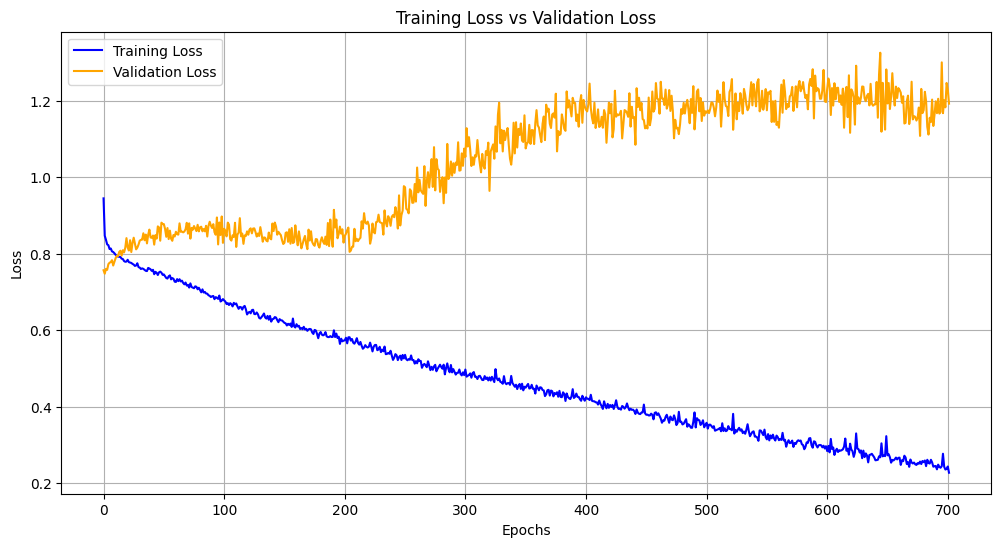

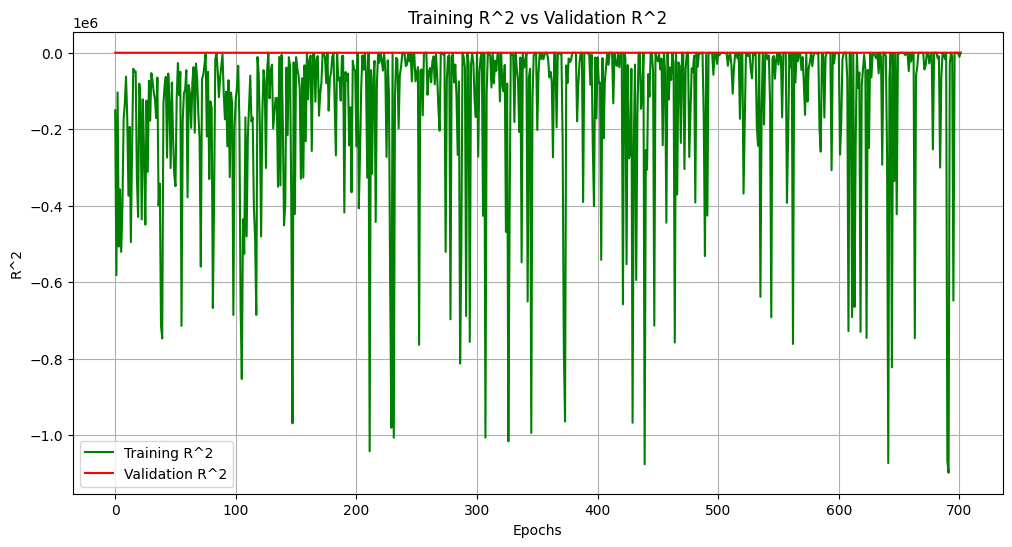

In [41]:
# Extract the metrics from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
r_square = history.history['r_square']
val_r_square = history.history['val_r_square']

# Plot loss and val_loss
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot r_square and val_r_square
plt.figure(figsize=(12, 6))
plt.plot(r_square, label='Training R^2', color='green')
plt.plot(val_r_square, label='Validation R^2', color='red')
plt.title('Training R^2 vs Validation R^2')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()
plt.grid()
plt.show()

In [42]:
# Find the minimum loss for training and validation
min_training_loss = min(loss)
min_validation_loss = min(val_loss)

# Print the results
print(f"Minimum Training Loss: {min_training_loss}")
print(f"Minimum Validation Loss: {min_validation_loss}")

Minimum Training Loss: 0.22697724401950836
Minimum Validation Loss: 0.747836172580719


In [43]:
# Find the maximum R² values for training and validation
max_r_square_train = max(r_square)
max_r_square_val = max(val_r_square)

# Print the results
print(f"Maximum Training R²: {max_r_square_train}")
print(f"Maximum Validation R²: {max_r_square_val}")

Maximum Training R²: 0.6277450323104858
Maximum Validation R²: -0.024994611740112305


71/71 [==============================] - 1s 4ms/step


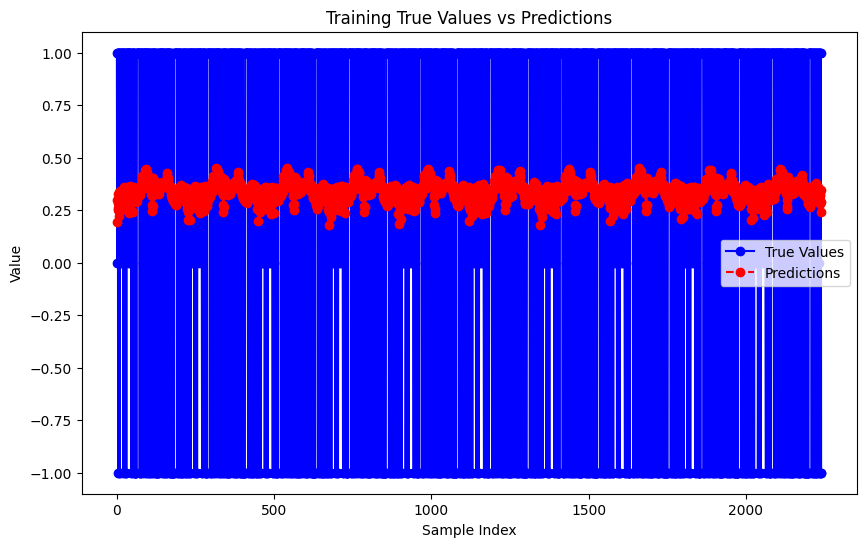

In [44]:
# Generate predictions for the training set
Y_train_pred = model.predict(X_train)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label='True Values', color='blue',  marker='o')
plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Training True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

1/1 [==============================] - 0s 32ms/step


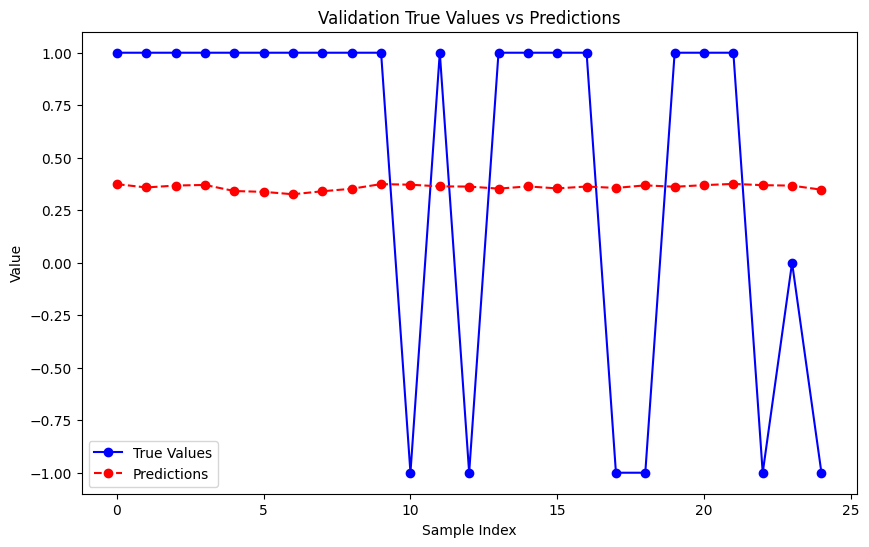

In [45]:
# Generate predictions for the validation set
Y_val_pred = model.predict(X_val)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step


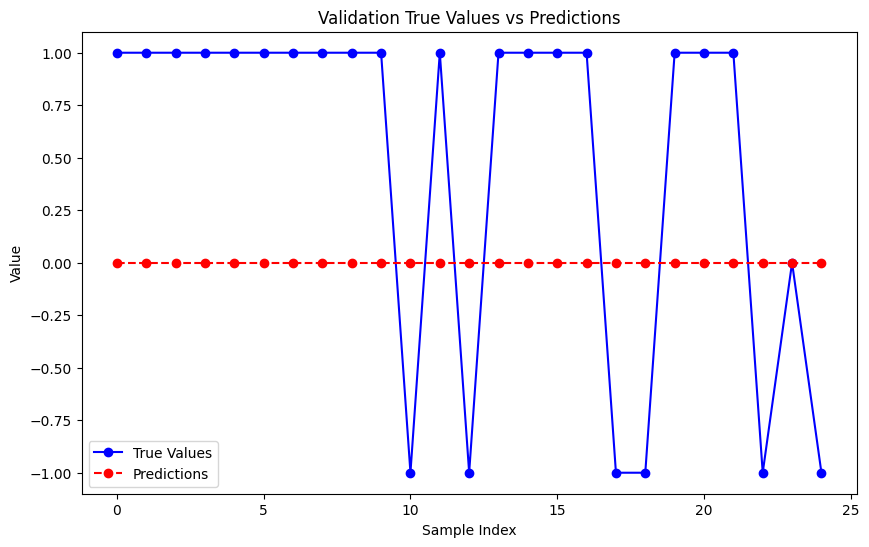

In [46]:
# Generate predictions for the validation set
Y_val_pred = model.predict(X_val)
Y_val_pred = np.where(Y_val_pred > 0.5, 1,np.where(Y_val_pred<-0.5, -1, 0) )

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  6  0]
 [ 0  1  0]
 [ 0 18  0]]


In [48]:
# Calculate total accuracy
total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 4.00%


1/1 [==============================] - 0s 31ms/step


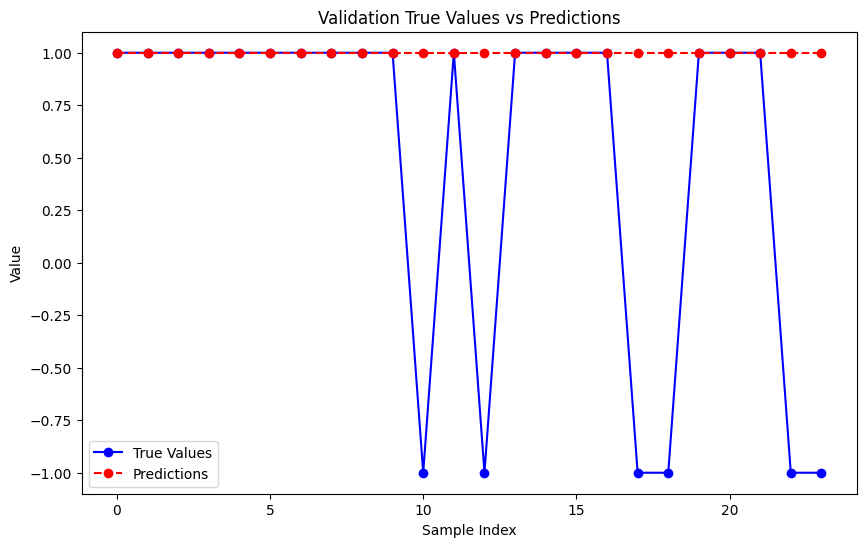

In [49]:
# Generate predictions for the validation set
Y_val_pred = model.predict(X_test_filtered)
Y_val_pred = np.where(Y_val_pred > 0, 1, -1)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test_filtered, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test_filtered.flatten(), Y_val_pred.flatten())

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  6]
 [ 0 18]]


In [51]:
# Calculate total accuracy
total_accuracy = np.sum(Y_test_filtered.flatten() == Y_val_pred.flatten()) / len(Y_test_filtered)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 75.00%


1/1 [==============================] - 0s 35ms/step


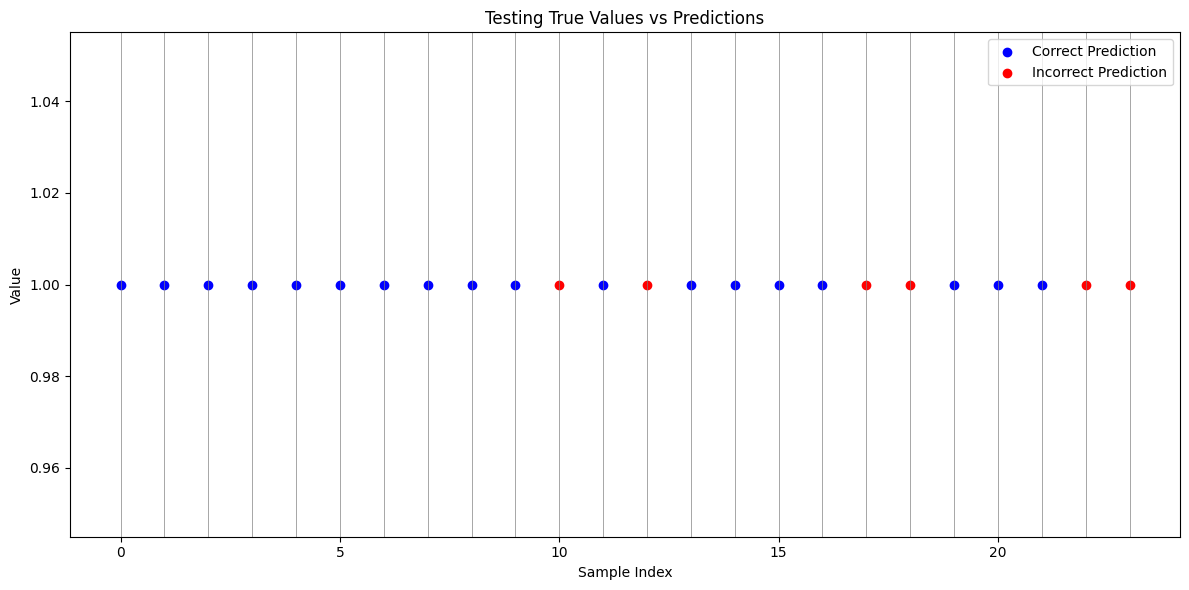

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the validation set
Y_val_pred = model.predict(X_test_filtered)
Y_val_pred = np.where(Y_val_pred > 0.25, 1, -1)

# Flatten if needed
Y_val_pred = Y_val_pred.flatten()
Y_test_filtered = Y_test_filtered.flatten()

# Prepare index and classification of correctness
indices = np.arange(len(Y_test_filtered))
correct = Y_val_pred == Y_test_filtered
incorrect = ~correct

# Plot the figure
plt.figure(figsize=(12, 6))

# Add vertical gray lines
for i in range(len(Y_test_filtered)):
    plt.axvline(x=i, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# Plot true values as reference shadow
# plt.scatter(indices, Y_test_filtered, color='blue', label='True Value (Reference)', marker='o', alpha=0.3)

# Plot correct predictions (overlapping with true values)
plt.scatter(indices[correct], Y_val_pred[correct], color='blue', marker='o', label='Correct Prediction')

# Plot incorrect predictions
plt.scatter(indices[incorrect], Y_val_pred[incorrect], color='red', marker='o', label='Incorrect Prediction')

# Labels and title
plt.title('Testing True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test_filtered.flatten(), Y_val_pred.flatten())

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  6]
 [ 0 18]]


In [54]:
# Calculate total accuracy
total_accuracy = np.sum(Y_test_filtered.flatten() == Y_val_pred.flatten()) / len(Y_test_filtered)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 75.00%
